# DeepCall

Step 1: Feature Extraction - after collection audio data, extract the features  
Step 2: Speaker Clustering - identify who is speaker 1 and who is speaker 2  
Step 3: Training - train your model to classify the data into: Speech, Laughter, Silence, Filler Words  
Step 4: User Study

In [36]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
from pyAudioAnalysis import audioSegmentation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Wav-files contain channels. Choosing 1 channel prevents problems down the line.
def fixWavFile(filename):
    sound = AudioSegment.from_wav(filename)
    sound = sound.set_channels(1)
    sound.export(filename, format="wav")


# Classifies audio into 2 speakers + plot functionality
def speakerDiarization(filename, plot = False):
    speakers = audioSegmentation.speakerDiarization(filename, 2, plot_res=False)                                            
    dataframe=pd.DataFrame(speakers, columns=['category'])
    dataframe["seconds"] = np.linspace(0,dataframe.shape[0]/5,dataframe.shape[0])
    if plot == True:
        generatePlot(dataframe)

# Plot functionality for speakerDiarization
def generatePlot(dataframe):
    figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
    plt.style.use('ggplot')
    x = dataframe["seconds"]
    plt.xticks(np.arange(min(x), max(x)+1, 5.0))
    plt.xticks(rotation=90)
    plt.yticks([0, 1])
    plt.xlabel("Seconds")
    plt.ylabel("Speakers")
    plt.title("Speaker Diarization")
    plt.plot(dataframe["seconds"], dataframe["category"])
    plt.show()

# Speaker Diarization 

This algorithm allows us to know who is speaking in a conversation.

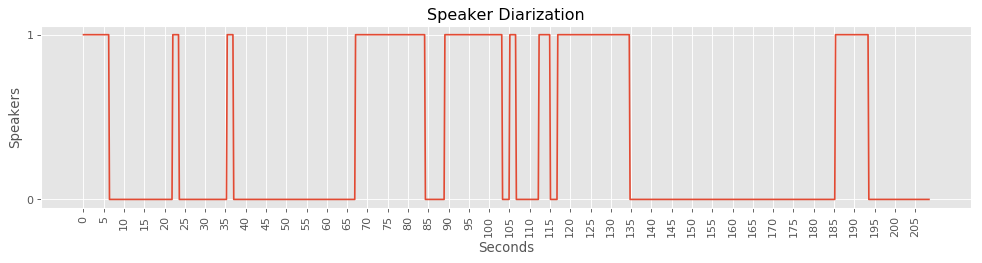

In [37]:
speakerDiarization("Sinclair.wav", plot = True)

# Machine Learning Classification!

We extract mid-term features. We use a long-term averaging of the mid-term features, leading to 1 feature vector for each class.

Well this is embarrassingly short piece of code...

In [33]:
aT.featureAndTrain(["Filler Words","Laughter"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "randomforest", "rf", perTrain=0.50)

Analyzing file 1 of 2: Filler Words\filler1.wav
Analyzing file 2 of 2: Filler Words\filler2.wav
Feature extraction complexity ratio: 41.1 x realtime
Analyzing file 1 of 2: Laughter\laughter1.wav
Analyzing file 2 of 2: Laughter\laughter2.wav
Feature extraction complexity ratio: 44.2 x realtime
Param = 10.00000 - classifier Evaluation Experiment 1 of 100
Param = 10.00000 - classifier Evaluation Experiment 2 of 100
Param = 10.00000 - classifier Evaluation Experiment 3 of 100
Param = 10.00000 - classifier Evaluation Experiment 4 of 100
Param = 10.00000 - classifier Evaluation Experiment 5 of 100
Param = 10.00000 - classifier Evaluation Experiment 6 of 100
Param = 10.00000 - classifier Evaluation Experiment 7 of 100
Param = 10.00000 - classifier Evaluation Experiment 8 of 100
Param = 10.00000 - classifier Evaluation Experiment 9 of 100
Param = 10.00000 - classifier Evaluation Experiment 10 of 100
Param = 10.00000 - classifier Evaluation Experiment 11 of 100
Param = 10.00000 - classifier Eva

Param = 25.00000 - classifier Evaluation Experiment 32 of 100
Param = 25.00000 - classifier Evaluation Experiment 33 of 100
Param = 25.00000 - classifier Evaluation Experiment 34 of 100
Param = 25.00000 - classifier Evaluation Experiment 35 of 100
Param = 25.00000 - classifier Evaluation Experiment 36 of 100
Param = 25.00000 - classifier Evaluation Experiment 37 of 100
Param = 25.00000 - classifier Evaluation Experiment 38 of 100
Param = 25.00000 - classifier Evaluation Experiment 39 of 100
Param = 25.00000 - classifier Evaluation Experiment 40 of 100
Param = 25.00000 - classifier Evaluation Experiment 41 of 100
Param = 25.00000 - classifier Evaluation Experiment 42 of 100
Param = 25.00000 - classifier Evaluation Experiment 43 of 100
Param = 25.00000 - classifier Evaluation Experiment 44 of 100
Param = 25.00000 - classifier Evaluation Experiment 45 of 100
Param = 25.00000 - classifier Evaluation Experiment 46 of 100
Param = 25.00000 - classifier Evaluation Experiment 47 of 100
Param = 

Param = 50.00000 - classifier Evaluation Experiment 65 of 100
Param = 50.00000 - classifier Evaluation Experiment 66 of 100
Param = 50.00000 - classifier Evaluation Experiment 67 of 100
Param = 50.00000 - classifier Evaluation Experiment 68 of 100
Param = 50.00000 - classifier Evaluation Experiment 69 of 100
Param = 50.00000 - classifier Evaluation Experiment 70 of 100
Param = 50.00000 - classifier Evaluation Experiment 71 of 100
Param = 50.00000 - classifier Evaluation Experiment 72 of 100
Param = 50.00000 - classifier Evaluation Experiment 73 of 100
Param = 50.00000 - classifier Evaluation Experiment 74 of 100
Param = 50.00000 - classifier Evaluation Experiment 75 of 100
Param = 50.00000 - classifier Evaluation Experiment 76 of 100
Param = 50.00000 - classifier Evaluation Experiment 77 of 100
Param = 50.00000 - classifier Evaluation Experiment 78 of 100
Param = 50.00000 - classifier Evaluation Experiment 79 of 100
Param = 50.00000 - classifier Evaluation Experiment 80 of 100
Param = 

Param = 100.00000 - classifier Evaluation Experiment 97 of 100
Param = 100.00000 - classifier Evaluation Experiment 98 of 100
Param = 100.00000 - classifier Evaluation Experiment 99 of 100
Param = 100.00000 - classifier Evaluation Experiment 100 of 100
Param = 200.00000 - classifier Evaluation Experiment 1 of 100
Param = 200.00000 - classifier Evaluation Experiment 2 of 100
Param = 200.00000 - classifier Evaluation Experiment 3 of 100
Param = 200.00000 - classifier Evaluation Experiment 4 of 100
Param = 200.00000 - classifier Evaluation Experiment 5 of 100
Param = 200.00000 - classifier Evaluation Experiment 6 of 100
Param = 200.00000 - classifier Evaluation Experiment 7 of 100
Param = 200.00000 - classifier Evaluation Experiment 8 of 100
Param = 200.00000 - classifier Evaluation Experiment 9 of 100
Param = 200.00000 - classifier Evaluation Experiment 10 of 100
Param = 200.00000 - classifier Evaluation Experiment 11 of 100
Param = 200.00000 - classifier Evaluation Experiment 12 of 100


Param = 500.00000 - classifier Evaluation Experiment 28 of 100
Param = 500.00000 - classifier Evaluation Experiment 29 of 100
Param = 500.00000 - classifier Evaluation Experiment 30 of 100
Param = 500.00000 - classifier Evaluation Experiment 31 of 100
Param = 500.00000 - classifier Evaluation Experiment 32 of 100
Param = 500.00000 - classifier Evaluation Experiment 33 of 100
Param = 500.00000 - classifier Evaluation Experiment 34 of 100
Param = 500.00000 - classifier Evaluation Experiment 35 of 100
Param = 500.00000 - classifier Evaluation Experiment 36 of 100
Param = 500.00000 - classifier Evaluation Experiment 37 of 100
Param = 500.00000 - classifier Evaluation Experiment 38 of 100
Param = 500.00000 - classifier Evaluation Experiment 39 of 100
Param = 500.00000 - classifier Evaluation Experiment 40 of 100
Param = 500.00000 - classifier Evaluation Experiment 41 of 100
Param = 500.00000 - classifier Evaluation Experiment 42 of 100
Param = 500.00000 - classifier Evaluation Experiment 43

In [35]:
aT.featureAndTrain(["Filler Words","Laughter"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "gradientboosting", "gb",perTrain=0.50)

Analyzing file 1 of 2: Filler Words\filler1.wav
Analyzing file 2 of 2: Filler Words\filler2.wav
Feature extraction complexity ratio: 41.4 x realtime
Analyzing file 1 of 2: Laughter\laughter1.wav
Analyzing file 2 of 2: Laughter\laughter2.wav
Feature extraction complexity ratio: 26.1 x realtime
Param = 10.00000 - classifier Evaluation Experiment 1 of 100
Param = 10.00000 - classifier Evaluation Experiment 2 of 100
Param = 10.00000 - classifier Evaluation Experiment 3 of 100
Param = 10.00000 - classifier Evaluation Experiment 4 of 100
Param = 10.00000 - classifier Evaluation Experiment 5 of 100
Param = 10.00000 - classifier Evaluation Experiment 6 of 100
Param = 10.00000 - classifier Evaluation Experiment 7 of 100
Param = 10.00000 - classifier Evaluation Experiment 8 of 100
Param = 10.00000 - classifier Evaluation Experiment 9 of 100
Param = 10.00000 - classifier Evaluation Experiment 10 of 100
Param = 10.00000 - classifier Evaluation Experiment 11 of 100
Param = 10.00000 - classifier Eva

Param = 25.00000 - classifier Evaluation Experiment 35 of 100
Param = 25.00000 - classifier Evaluation Experiment 36 of 100
Param = 25.00000 - classifier Evaluation Experiment 37 of 100
Param = 25.00000 - classifier Evaluation Experiment 38 of 100
Param = 25.00000 - classifier Evaluation Experiment 39 of 100
Param = 25.00000 - classifier Evaluation Experiment 40 of 100
Param = 25.00000 - classifier Evaluation Experiment 41 of 100
Param = 25.00000 - classifier Evaluation Experiment 42 of 100
Param = 25.00000 - classifier Evaluation Experiment 43 of 100
Param = 25.00000 - classifier Evaluation Experiment 44 of 100
Param = 25.00000 - classifier Evaluation Experiment 45 of 100
Param = 25.00000 - classifier Evaluation Experiment 46 of 100
Param = 25.00000 - classifier Evaluation Experiment 47 of 100
Param = 25.00000 - classifier Evaluation Experiment 48 of 100
Param = 25.00000 - classifier Evaluation Experiment 49 of 100
Param = 25.00000 - classifier Evaluation Experiment 50 of 100
Param = 

Param = 50.00000 - classifier Evaluation Experiment 75 of 100
Param = 50.00000 - classifier Evaluation Experiment 76 of 100
Param = 50.00000 - classifier Evaluation Experiment 77 of 100
Param = 50.00000 - classifier Evaluation Experiment 78 of 100
Param = 50.00000 - classifier Evaluation Experiment 79 of 100
Param = 50.00000 - classifier Evaluation Experiment 80 of 100
Param = 50.00000 - classifier Evaluation Experiment 81 of 100
Param = 50.00000 - classifier Evaluation Experiment 82 of 100
Param = 50.00000 - classifier Evaluation Experiment 83 of 100
Param = 50.00000 - classifier Evaluation Experiment 84 of 100
Param = 50.00000 - classifier Evaluation Experiment 85 of 100
Param = 50.00000 - classifier Evaluation Experiment 86 of 100
Param = 50.00000 - classifier Evaluation Experiment 87 of 100
Param = 50.00000 - classifier Evaluation Experiment 88 of 100
Param = 50.00000 - classifier Evaluation Experiment 89 of 100
Param = 50.00000 - classifier Evaluation Experiment 90 of 100
Param = 

Param = 200.00000 - classifier Evaluation Experiment 7 of 100
Param = 200.00000 - classifier Evaluation Experiment 8 of 100
Param = 200.00000 - classifier Evaluation Experiment 9 of 100
Param = 200.00000 - classifier Evaluation Experiment 10 of 100
Param = 200.00000 - classifier Evaluation Experiment 11 of 100
Param = 200.00000 - classifier Evaluation Experiment 12 of 100
Param = 200.00000 - classifier Evaluation Experiment 13 of 100
Param = 200.00000 - classifier Evaluation Experiment 14 of 100
Param = 200.00000 - classifier Evaluation Experiment 15 of 100
Param = 200.00000 - classifier Evaluation Experiment 16 of 100
Param = 200.00000 - classifier Evaluation Experiment 17 of 100
Param = 200.00000 - classifier Evaluation Experiment 18 of 100
Param = 200.00000 - classifier Evaluation Experiment 19 of 100
Param = 200.00000 - classifier Evaluation Experiment 20 of 100
Param = 200.00000 - classifier Evaluation Experiment 21 of 100
Param = 200.00000 - classifier Evaluation Experiment 22 of

Param = 500.00000 - classifier Evaluation Experiment 38 of 100
Param = 500.00000 - classifier Evaluation Experiment 39 of 100
Param = 500.00000 - classifier Evaluation Experiment 40 of 100
Param = 500.00000 - classifier Evaluation Experiment 41 of 100
Param = 500.00000 - classifier Evaluation Experiment 42 of 100
Param = 500.00000 - classifier Evaluation Experiment 43 of 100
Param = 500.00000 - classifier Evaluation Experiment 44 of 100
Param = 500.00000 - classifier Evaluation Experiment 45 of 100
Param = 500.00000 - classifier Evaluation Experiment 46 of 100
Param = 500.00000 - classifier Evaluation Experiment 47 of 100
Param = 500.00000 - classifier Evaluation Experiment 48 of 100
Param = 500.00000 - classifier Evaluation Experiment 49 of 100
Param = 500.00000 - classifier Evaluation Experiment 50 of 100
Param = 500.00000 - classifier Evaluation Experiment 51 of 100
Param = 500.00000 - classifier Evaluation Experiment 52 of 100
Param = 500.00000 - classifier Evaluation Experiment 53

In [ ]:
# Create a dataframe with all the features + plot functionality
# def extractFeatures(filename, plot = False):
#     frame_size = 0.050
#     frame_step = 0.025

#     [Fs, x] = audioBasicIO.readAudioFile(filename);
#     F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, frame_size*Fs, frame_step*Fs);
#     dataframe = pd.DataFrame(data=F.reshape(F.shape[1], F.shape[0]), columns = f_names)
    
#     if plot == True:
#         for i in range(len(f_names)):
#             plt.plot(F[i,:]); plt.xlabel('Frame no'); 
#             plt.ylabel(f_names[i]);
#             plt.show();
#     return dataframe


In [ ]:
# import keras
# model = Sequential()
# model.add(Dense(64, activation='relu', input_dim=34))
# model.add(Dense(2, activation='softmax'))
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Generate dummy data
# import numpy as np
# # data = np.random.random((1000, 100))
# # labels = np.random.randint(10, size=(1000, 1))

# # Convert labels to categorical one-hot encoding
# one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

# # Train the model, iterating on the data in batches of 32 samples
# history = model.fit(X_train, one_hot_labels, epochs=150, batch_size=64, validation_split=0.20)

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()